In [177]:
# Digit recognizer using SVM linear kernel. Input files from Kaggle.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [178]:
digits = pd.read_csv("train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [179]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


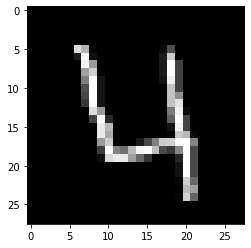

In [180]:
four = digits.iloc[3, 1:]
four.shape
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [181]:
print(four[5:-5, 5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [182]:
''' 
Experimental - convert all "grey" pixels below a threshold as 0 and above second threshold as 255. 
Add additional criteria for testing, as needed.

Visually, it becomes more clearer for humans to read. Experiment if SVM behaves in similar fashion. 
Check the predictions before & after using the following code - Satish
'''
######
'''
digits[digits[digits.columns[1:]] >= 200] = 255
digits[digits[digits.columns[1:]] < 50 ] = 0
digits[(digits[digits.columns[1:]] >= 50) & (digits[digits.columns[1:]] < 200 ) ] = 150

four = digits.iloc[3, 1:]
four.shape
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')
print(four[5:-5, 5:-5])
'''


"\ndigits[digits[digits.columns[1:]] >= 200] = 255\ndigits[digits[digits.columns[1:]] < 50 ] = 0\ndigits[(digits[digits.columns[1:]] >= 50) & (digits[digits.columns[1:]] < 200 ) ] = 150\n\nfour = digits.iloc[3, 1:]\nfour.shape\nfour = four.values.reshape(28, 28)\nplt.imshow(four, cmap='gray')\nprint(four[5:-5, 5:-5])\n"

In [183]:
# Creating training and test sets
# Splitting the data into train and test


X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=25% (reassigned) and test size=20%
# though test.csv is separate file, use it to compare with labels for accuracy score - Satish R
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.25, test_size=0.20, random_state=101)

## reset training data to entire dataset
# x_train = digits.iloc[:, 1:]
# y_train = digits.iloc[:, 0]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(10500, 784)
(8400, 784)
(10500,)
(8400,)


In [184]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel
svm_linear = svm.SVC(kernel='linear')

# svm_linear = svm.SVC(kernel='poly')
# svm_linear = svm.SVC(kernel='rbf')

# fit
svm_linear.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [185]:
# predict
predictions = svm_linear.predict(x_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [186]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
##### temp commented - Satish
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[764,   0,   0,   0,   0,  11,   7,   0,   6,   1],
       [  0, 932,   4,   1,   1,   1,   3,   1,   3,   2],
       [  7,  20, 775,  16,  13,   2,  10,   6,  10,   0],
       [  3,  11,  30, 756,   3,  29,   2,   6,  12,   7],
       [  3,   4,  10,   1, 774,   1,   3,   2,   0,  20],
       [ 14,  10,   4,  41,   7, 625,  17,   1,  13,   1],
       [  9,   3,   6,   0,   5,  13, 787,   0,   1,   0],
       [  3,   4,  13,   5,  21,   1,   0, 802,   0,  24],
       [  8,  12,  11,  37,   5,  25,   9,   6, 691,  16],
       [  6,   5,  10,   9,  52,   2,   0,  44,   5, 744]], dtype=int64)

In [187]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

### Accuracy scores for each type of kernel
#
# poly:	0.87125
# linear:	0.91312
# rbf:	0.93964
#
### Each of these are separate runs with no gamma / C tuning.
### Continue using linear kernel for speed - Satish R


0.9107142857142857

In [188]:
# creating a single dataframe to compare which values did not match so that we can plot & check
pred1 = pd.Series(predictions)
rows = cols = 4
n = rows * cols
frame = {'predicted': pred1.values, 'test': y_test.values, 'y_test_index': y_test.index}
df1 = pd.DataFrame(frame)
df2 = df1.loc[df1['predicted'] != df1['test']]
df2 = df2.sample(n = n, replace = True, random_state=1).reset_index(drop=True)


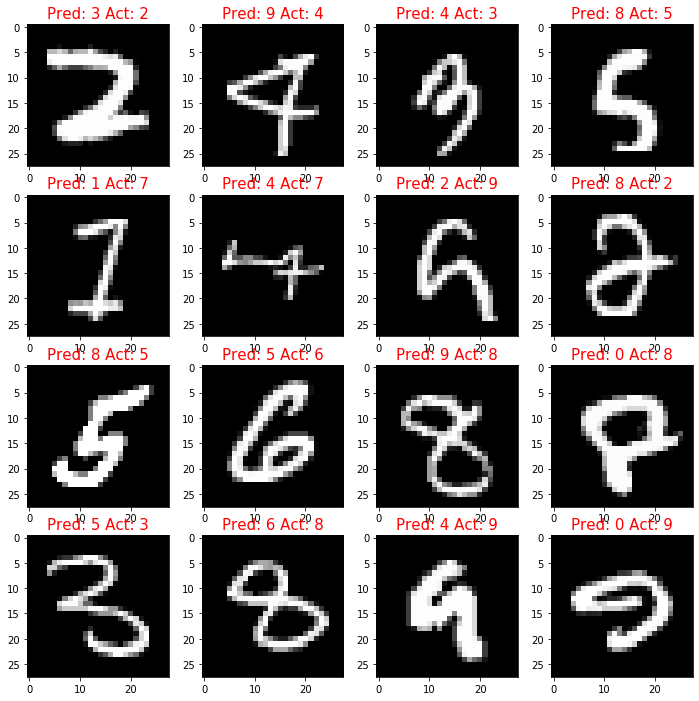

In [189]:
# Plot few wrongly predicted letters. People need to improve their handwriting !! :-)
#
fig=plt.figure(figsize=(12, 12))
for i in range(1, n+1):
    y_test_ix = df2.iloc[i-1, 2]
    pred_num = df2.iloc[i-1, 0]
    test_num = df2.iloc[i-1, 1]
    ax = fig.add_subplot(4, 4, i)
    num1 = digits.iloc[y_test_ix, 1:]
    num1 = num1.values.reshape(28, 28)
    
    ax.set_title("Pred: " + str(pred_num) + " Act: " + str(test_num), fontsize="15", color="red")
    plt.imshow(num1, cmap='gray')
plt.show()


In [190]:
digits_test = pd.read_csv("test.csv")
x_test = digits_test.iloc[:, 0:]
predictions = svm_linear.predict(x_test)

In [191]:
predictions[:n]

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3, 3, 7, 8, 0, 4, 3], dtype=int64)

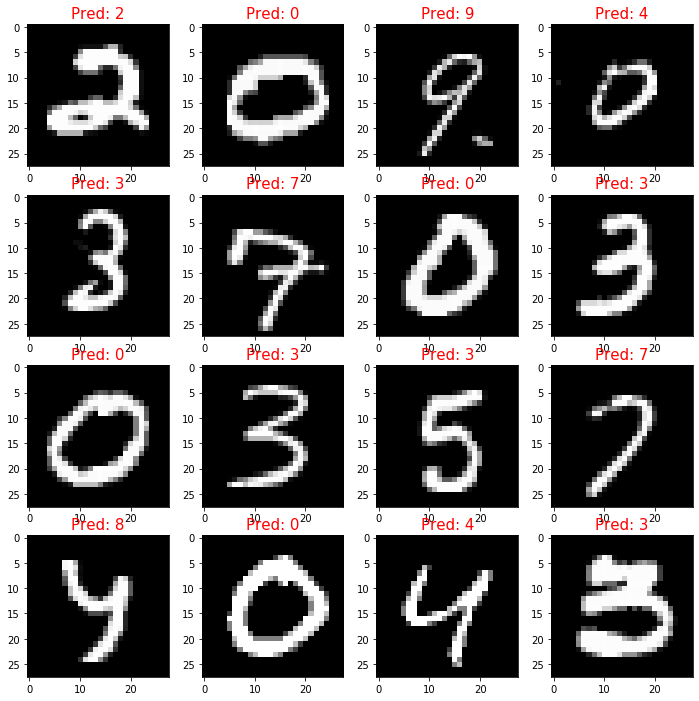

In [192]:
# Plot 
fig=plt.figure(figsize=(12, 12))
for i in range(1, n+1):
    ax = fig.add_subplot(4, 4, i)
    num1 = x_test.iloc[i-1, 0:]
    num1 = num1.values.reshape(28, 28)
    
    ax.set_title("Pred: " + str(predictions[i-1]), fontsize="15", color="red")
    plt.imshow(num1, cmap='gray')
plt.show()

In [193]:
# Write to submission.csv
d = {'ImageID': [i for i in range(predictions.size)], 'label': list(predictions) }
df4 = pd.DataFrame(d)
df4['ImageID'] = df4['ImageID'] + 1
# print (df4.head())
df4.set_index('ImageID', inplace=True) 
print (df4.head())
df4.to_csv('submission.csv')

         label
ImageID       
1            2
2            0
3            9
4            4
5            3
